<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B5%D0%BC_%D1%82%D0%B5%D0%BA%D1%81%D1%82_%D0%B2%D0%BD%D1%83%D1%82%D1%80%D0%B8_%D0%B7%D0%B0%D0%BF%D0%BE%D0%BB%D0%BD%D0%B5%D0%BD%D0%BD%D0%BE%D0%B9_%D1%84%D0%BE%D1%80%D0%BC%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Распознаем текст внутри заполненной формы


# Recognize text inside a filled out form


В этом уроке мы научимся распознавать, что написано в определенной части документа, по факту, преобразовывая форму в электронном виде.

Делать мы это будем уже из полученных знаний в прошлых уроках, объединяя все воедино в базовый конвейер с помощью **OpenCV** и **Tesseract**.



In this lesson, we'll learn how to recognize what's written in a particular part of a document by actually converting the form electronically.

We'll do this already from what we've learned in previous lessons, combining everything into a basic pipeline using **OpenCV** and **Tesseract**.

Сперва нам необходимо взять определенные поля, отвечающие за какие-то данные. В нашем случае мы выделяем это все вручную (например, из того же paint можно взять координаты, выделяя ту или иную область)


First, we need to take certain fields that are responsible for some data. In our case, we select it all manually (for example, from the same paint you can take the coordinates by selecting one or another area)


Для этого мы наводим на левый верхний край нашей области и записываем координаты, которые выводятся в самом нижнем левом углу 


To do this, we point to the upper left edge of our area and write the coordinates, which are displayed in the very bottom left corner 

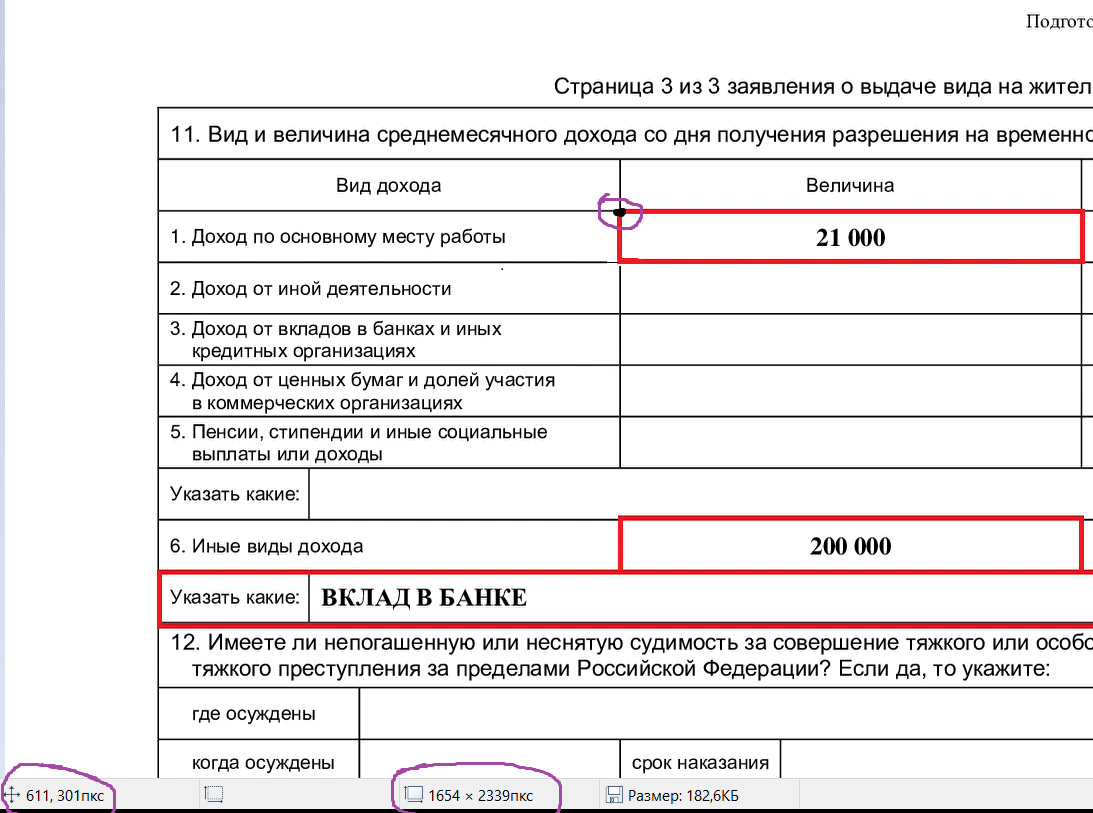

Записывать мы их будем чуточку позже в словарь **OCR_LOCATIONS**, после установки всех необходимых библиотек 

We will write them down a bit later in the **OCR_LOCATIONS** dictionary, after installing all the necessary libraries 

# Код

In [1]:
# установим и распакуем архив
# install and unpack the archive
!wget http://dataudt.ru/datasets/cv/Lesson_10.Text_from_form.zip
!unzip -qq Lesson_10.Text_from_form.zip
%cd Text_from_form

--2022-02-10 07:11:29--  http://dataudt.ru/datasets/cv/Lesson_10.Text_from_form.zip
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18191776 (17M) [application/zip]
Saving to: ‘Lesson_10.Text_from_form.zip’

Lesson_10.Text_from 100%[===================>]  17.35M  9.81MB/s    in 1.8s    

2022-02-10 07:11:32 (9.81 MB/s) - ‘Lesson_10.Text_from_form.zip’ saved [18191776/18191776]

/content/Text_from_form


Для начала скачиваем **tesseract**


First, download **tesseract**


In [2]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

Обратите внимание, что  pytesseract устанавливается чуточку сложнее, чем обычная библиотека. После его установки мы должны добавить его в PATH и указать путь к тому месту, где он установлен. В случае с колабом, мы указываем данный путь: 

Note that pytesseract is a bit more complicated to install than a normal library. After installing it, we have to add it to the PATH and specify the path to where it is installed. In the case of colab, we specify this path: 

In [3]:
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

Этот путь мы узнали благодаря команде which 

We learned this way thanks to the team which 


In [4]:
!which tesseract

/usr/bin/tesseract


Классический tesseract распознает текст только на английском языке, поэтому, чтобы он работал и с русскими данными, мы скачаем дополнительный файл с [официальной документации](https://tesseract-ocr.github.io/tessdoc/Data-Files#data-files-for-version-400-november-29-2016) для версии 4.00 (он уже лежит в архиве) и переместим его в системную папку, где лежит наша библиотека. 


Classic tesseract only recognizes text in English, so to make it work with Russian data, we download an additional file from [official documentation] (https://tesseract-ocr.github.io/tessdoc/Data-Files#data-files-for-version-400-november-29-2016) for version 4.00 (it is already in the archive) and move it to the system folder, where our library is. 

In [5]:
!mv "/content/Text_from_form/rus.traineddata" "/usr/share/tesseract-ocr/4.00/tessdata/"

После настройки вернемся обратно к написанию кода 

After setting this up, let's go back to writing code 





In [6]:


# импортируем необходимые пакеты
# import the necessary packages

from collections import namedtuple
import pytesseract
import imutils
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

Пропишем 2 доп функции, с которыми мы уже знакомы 


Let's write two additional functions that we are already familiar with 


In [7]:
# дополнительная функция для очистки текста
# additional function to clear text
def cleanup_text(text):
    # вырезаем не-ASCII текст, чтобы мы могли нарисовать его на изображении 
    # с помощью OpenCV
    # strip out non-ASCII text so we can draw the text on the image
	# using OpenCV
	return "".join([c if (ord(c) < 128)  or ((ord(c) > 1039) and (ord(c) < 1104))  else "" for c in text]).strip()

In [8]:
# дополнительная функция для выравнивания изображения  (идентичная функция из прошлого урока)
# additional function for aligning the image (identical to the function from the last lesson)
def align_images(image, template, maxFeatures=500, keepPercent=0.2,
    debug=False):
    # преобразование входного изображения и шаблона в оттенки серого
    # convert both the input image and template to grayscale
    imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    templateGray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

    # используем ORB для обнаружения ключевых точек и
    # извлечения локальных инвариантных объектов
    # use ORB to detect keypoints and extract (binary) local
    # invariant features
    orb = cv2.ORB_create(maxFeatures)
    (kpsA, descsA) = orb.detectAndCompute(imageGray, None)
    (kpsB, descsB) = orb.detectAndCompute(templateGray, None)

    # ищем совпадения 
    # match the features
    # метод Хэмминга вычисляет расстояние между двоичными объектами, чтобы найти наилучшие совпадения 
    # Hamming's method calculates the distance between blobs to find the best matches
    method = cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING 
    matcher = cv2.DescriptorMatcher_create(method)
    matches = matcher.match(descsA, descsB, None)

    # сортируем совпадения по их расстоянию
    # (чем меньше расстояние, тем более похожи объекты)  
    # sort the matches by their distance (the smaller the distance,
    # the "more similar" the features are) 

    matches = sorted(matches, key=lambda x:x.distance)

    # оставляем только лучшие совпадения 
    # keep only the top matches
    keep = int(len(matches) * keepPercent)
    matches = matches[:keep]

    # проверяем, необходимо ли визуализировать совпадающие ключевые точки
    # check to see if we should visualize the matched keypoints
    if debug:
        matchedVis = cv2.drawMatches(image, kpsA, template, kpsB,
            matches, None)
        matchedVis = imutils.resize(matchedVis, width=1000)
        # print('Соответствующие ключевые точки:')
        print('Corresponding key points:')
        cv2_imshow(matchedVis)
       

    # выделяем память для ключевых точек из лучших совпадений 
    # (эти координаты будем использовать для вычисления
    # нашей матрицы гомографии)
    # allocate memory for the keypoints (x,y-coordinates) from the
    # top matches -- we'll use these coordinates to compute our
    # homography matrix

    ptsA = np.zeros((len(matches), 2), dtype="float")
    ptsB = np.zeros((len(matches), 2), dtype="float")

    # выполняем цикл над лучшими совпадениями 
    # loop over the top matches
    for (i, m) in enumerate(matches):
        # указываем, что две ключевые точки
        # на соответствующих изображениях соответствуют друг другу
        # indicate that the two keypoints in the respective images
        # map to each other
        ptsA[i] = kpsA[m.queryIdx].pt
        ptsB[i] = kpsB[m.trainIdx].pt

    # вычисляем матрицу гомографии между двумя наборами совпадающих
    # точек
    # compute the homography matrix between the two sets of matched
    # points

    (H, mask) = cv2.findHomography(ptsA, ptsB, method=cv2.RANSAC)

    # используем матрицу гомографии для выравнивания изображений
    # use the homography matrix to align the images
    (h, w) = template.shape[:2]
    aligned = cv2.warpPerspective(image, H, (w, h))

    # возвращаем выровненное изображение
    # return the aligned image
    return aligned

In [9]:
# создадим отдельный словарь с аргументами 
# create a separate dictionary with arguments 

args = {
  "image" : "/content/Text_from_form/scans/scan_1.jpg", # путь к входному изображению, которое мы будем выравнивать 
                                                        # the path to the input image that we will align
  "template": "/content/Text_from_form/form.png", # путь к входному изображению шаблона
                                                  # the path to the input image of the pattern
}


In [10]:
# создаем именованный кортеж, где мы будем указывать расположение наших полей,
# которые мы будем распознавать
# create a named tuple which we can use to create locations of the
# input document which we wish to OCR
OCRLocation = namedtuple("OCRLocation", ["id", "bbox",
	"filter_keywords"]) # где id - имя поля, bbox - координаты ограничивающего 
    # прямоугольника , filter_keywords - слова, которые мы не хотим учитывать
    #  при распознавании  
    # where id is the field name, bbox is the coordinates of the bounding box 
    # rectangle , filter_keywords are the words we don't want to consider
    # recognition  


# определяем расположение каждой области документа, которую мы хотим
# распознать
# define the locations of each area of the document we wish to OCR

OCR_LOCATIONS = [
	OCRLocation("main_income", (608, 247, 464, 52),
		[]),
	OCRLocation("extra_income", (608, 553, 464, 52),
		[]),
	OCRLocation("where_extra_income", (150+150, 663-60, 1392-150, 54),
		["указать",'какие']),
	OCRLocation("place", (350, 856, 1192, 54),
		["субъект"]),
	OCRLocation("district", (350, 910, 1192, 54),
		[]),
	OCRLocation("area", (350, 964, 1192, 54), ["населенный",'пункт']),
	OCRLocation("street", (350, 1018, 1192, 54),
		["улица"]),
]


[INFO] loading images...
[INFO] align images...
[INFO] Recognize document text...
main_income
21 000



extra_income
‘ 200 000



where_extra_income
 
ВКЛАД В БаНКЕ



place
=====
 
ПРИМОРСКИЙ КРаЙ



district
 
НАДЕЖДИНСКИЙ РАЙОН



area
====
 
С. ТИМОФЕЕВКА



street
ЛЕНИНА
 
 





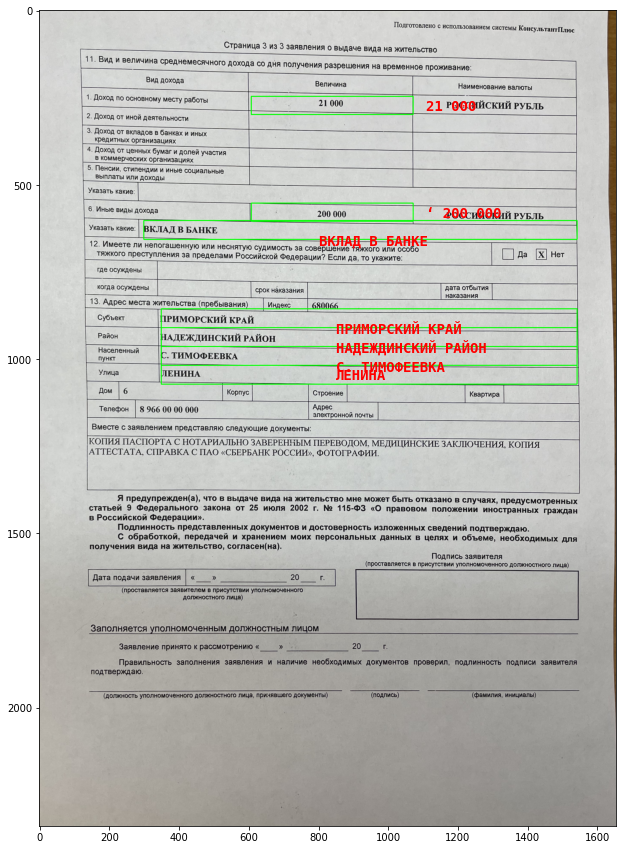

In [11]:
# загружаем входное изображение и шаблон с диска
# load the input image and template from disk
# print("[INFO] загружаем изображения...")
print("[INFO] loading images...")
image = cv2.imread(args["image"])
template = cv2.imread(args["template"])

# выравниваем изображения
# align the images
# print("[INFO] выравниваем изображения...")
print("[INFO] align images...")
aligned = align_images(image, template)


# инициализируем список результатов для хранения OCR документа
# initialize a results list to store the document OCR parsing results
# print("[INFO] Распознаем текст документа...")
print("[INFO] Recognize document text...")
parsingResults = []

# проходимся по всем полям
# loop over the locations of the document we are going to OCR
for loc in OCR_LOCATIONS:
    # извлекаем OCR ROI из выровненного изображения
    # extract the OCR ROI from the aligned image
	(x, y, w, h) = loc.bbox

	# roi = template[y:y + h, x:x + w]
	roi = aligned[y:y + h, x:x + w]

    # распознаем ROI с помощью Tesseract 
    # OCR the ROI using Tesseract
	rgb = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    # не забываем, что Tesseract ожидает 
    # don't forget what Tesseract expects
    # изображение в формате RGB, поэтому меняет цветовые каналы
    # the image is in RGB format, so it changes color channels
	text = pytesseract.image_to_string(rgb, lang='rus') 
    
    # разбиваем текст на строки и проходимся по ним
    # break the text into lines and loop over them
	for line in text.split("\n"):
        # если строка пустая, тот игнорируем ее 
        # if the line is empty, ignore it
		if len(line) == 0:
			continue

        # преобразовываем строку в нижний регистр и подсчитываем ее кол-во,
        # исключая проигнорированные слова 
        # convert the line to lowercase and then check to see if the
		# line contains any of the filter keywords (these keywords
		# are part of the *form itself* and should be ignored)
		lower = line.lower()
		count = sum([lower.count(x) for x in loc.filter_keywords])

        # если счетчик кол-ва отфильтрованных слов равен нулю, то мы записываем результат
        # if the count is zero than we know we are *not* examining a
		# text field that is part of the document itself (ex., info,
		# on the field, an example, help text, etc.)
		if count == 0:
            # и обновляем словарь результатов синтаксического анализа
            # update our parsing results dictionary with the OCR'd
			# text if the line is *not* empty
			parsingResults.append((loc, line))

# инициализируем словарь для хранения
# окончательных результатов распознавания
# initialize a dictionary to store our final OCR results
results = {}

# проходимся по всем результатам синтаксического анализа документа
# loop over the results of parsing the document
for (loc, line) in parsingResults:
    # захвываем любой существующий результат OCR для текущей части документа
    # grab any existing OCR result for the current part of the document
    r = results.get(loc.id, None)

    # если результат None, инициализируем его самостоятельно, используя именованный 
    # кортеж на основе текста и местоположения(преобразуя его в словарь, 
    # так как именованные кортежи не хэшируются)
    # if the result is None, initialize it using the text and location
	# namedtuple (converting it to a dictionary as namedtuples are not
	# hashable)
    if r is None:
        results[loc.id] = (line, loc._asdict())

    # иначе просто добавляем нашу существующую строку к результатам 
    # распознавания для текущей области документа
    # otherwise, there exists a OCR result for the current area of the
	# document, so we should append our existing line

    else:
        # распаковываем существующий результат распознавания текста и
        # добавляем новую строку к существующему
        # unpack the existing OCR result and append the line to the
        # existing text
        (existingText, loc) = r
        text = "{}\n{}".format(existingText, line)

        # обновляем словарь результатов
        # update our results dictionary
        results[loc["id"]] = (text, loc)


# чтобы русский текст тоже выводился на изображении используем matplotlib
# to display Russian text on the image, too, use matplotlib
font = {'family' : 'monospace',
    'weight' : 'bold', 
    'size'   : 14}  # устанавливаем параметры шрифта 
                    # set the font parameters 
plt.figure(figsize=(15,15))

# перебираем результаты
# loop over the results
for (locID, result) in results.items():
    # распаковываем кортеж результатов
    # unpack the result tuple
    (text, loc) = result

    # выводим результат OCR 
    # display the OCR result to our terminal
    print(loc["id"])
    print("=" * len(loc["id"]))
    print("{}\n\n".format(text))

    # извлекаем координаты ограничивающей рамки для OCR 
    # и затем удаляем текст, не относящийся к ASCII, чтобы 
    # мы могли нарисовать текст на выходном изображении с помощью OpenCV
    # extract the bounding box coordinates of the OCR location and
    # then strip out non-ASCII text so we can draw the text on the
    # output image using OpenCV
    (x, y, w, h) = loc["bbox"]
    clean = cleanup_text(text)

    # рисуем ограничивающую рамку вокруг текста
    # draw a bounding box around the text
    cv2.rectangle(aligned, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # перебираем все строки в тексте
    # loop over all lines in the text
    for (i, line) in enumerate(text.split("\n")[:-1]):
        # выводим текст построчно  
        # draw the line on the output image
        startY = y + (i*30) + 40
        plt.text(x+500, startY, line.upper(), color=(1, 0, 0), **font) 

   
aligned = cv2.cvtColor(aligned, cv2.COLOR_BGR2RGB)

# выводим получившееся изображение
# show the output image
plt.imshow(aligned)
plt.show()

